<a href="https://colab.research.google.com/github/wendyseal/AI-machine-learning/blob/main/Iris_KMeansCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# 讀進資料
# unsupervised 
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(iris["data"],iris["target"],test_size=0.1)

In [59]:
# 建立模型
# 做公式(fit)
# 已知種類數目的時候，K直接選
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3,init='k-means++') #k-means++ 讓三點盡可能彼此遠離
clu.fit(iris['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
# 分群結果
print("各群中心點:",clu.cluster_centers_)
print("訓練資料分群結果:",clu.labels_)

各群中心點: [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
訓練資料分群結果: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [67]:
# 驗證分群效果
# 預測(predict)
print("預測結果:",clu.predict(iris['data']))
print("正確結果:",iris['target'])
# 衡量方法(sklearn.metrics)
# groups flowers depending on their similarity.
from sklearn.metrics import accuracy_score
score = accuracy_score(clu.predict(x_test),y_test) #相似度
print("正確率:",score)



預測結果: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
正確結果: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
正確率: 0.06666666666666667


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'KMeansCluster')

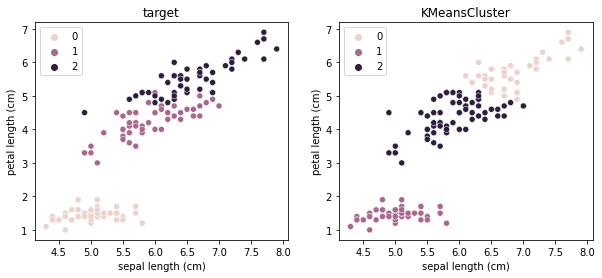

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.plot(x,y)
# plt.tilte("")
# plt.xlabel("K")
# plt.ylabel("Score")
# plt.show()

# plt.subplot(總高度,總寬度,第幾張[1,2,3,.....])
# 分成子圖
# plt.figure(figsize=(寬度inches,高度inches))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(df["sepal length (cm)"],
        df["petal length (cm)"],
        hue=iris["target"])
plt.title("target")

plt.subplot(1,2,2)
sns.scatterplot(df["sepal length (cm)"],
        df["petal length (cm)"],
        hue=clu.labels_)
plt.title("KMeansCluster")

[K值:] 2 [silhouette_score:]: 0.681046169211746
[K值:] 3 [silhouette_score:]: 0.5528190123564091
[K值:] 4 [silhouette_score:]: 0.4980505049972867
[K值:] 5 [silhouette_score:]: 0.4887488870931048
[K值:] 6 [silhouette_score:]: 0.3674845748098299
[K值:] 7 [silhouette_score:]: 0.35439644785886376
[K值:] 8 [silhouette_score:]: 0.35745369258527043
[K值:] 9 [silhouette_score:]: 0.3342968430937097


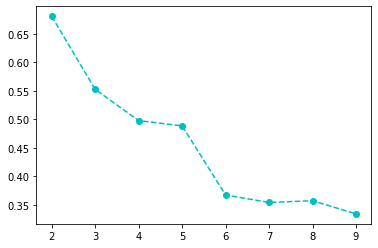

In [73]:
# 選擇KMeans的K, silhouette_score最大的K值
# 好的分群: 小群之間相似度高，群與群間的距離遠
# a:所在群與其他人間的平均距離(a越小越好) b:與最近的群其他人的平均距離(b越大越好)
# a/b 越小越好
# silhouette_score=1-a/b 越大越好
from sklearn.metrics import silhouette_score
scores=[]
ks=[]
for k in range(2,10):
  test=KMeans(n_clusters=k)
  test.fit(iris["data"])
  s=silhouette_score(iris["data"], test.labels_)
  scores.append(s)
  ks.append(k)
  print("[K值:]",k,"[silhouette_score:]:",s)
  
plt.plot(ks,scores,"co--")

# 雖然K=2最高，但0.5以上就代表是可以的Model。根據實際需要再決定~